In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import r2_score
from scipy.stats import zscore

In [2]:
data1 = pd.read_csv(r"C:\Users\Romina\OneDrive\Desktop\Project\Clean Notebooks and files\merged_proteomics_mri_all.csv")

data1

C:\Users\Romina\AppData\Local\Temp\ipykernel_40404\2195180560.py:1: DtypeWarning: Columns (25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439

,eid,Sex,Ethnic_background,Age_at_recruitment,Diagnoses_main_ICD10,Diagnoses_main_ICD10_1,Diagnoses_main_ICD10_2,Diagnoses_main_ICD10_3,Diagnoses_main_ICD10_4,Diagnoses_main_ICD10_5,...,Volume of precuneus (RH),Volume of rostralanteriorcingulate (RH),Volume of rostralmiddlefrontal (RH),Volume of superiorfrontal (RH),Volume of superiorparietal (RH),Volume of superiortemporal (RH),Volume of supramarginal (RH),Volume of transversetemporal (RH),Volume of insula (RH),Imaging
0,1000024,0,1001.0,67,F019,G309,I48,I620,I639,M169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1000043,1,1001.0,65,NaN,NaN,NaN,NaN,NaN,NaN,...,11092.0,2790.0,14412.0,27460.0,11672.0,16217.0,11242.0,915.0,6353.0,1
2,1000156,0,1001.0,62,E871,H258,H269,R074,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1000217,1,1003.0,63,C060,I269,R509,R69,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1000309,1,4002.0,60,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52695,6023140,0,1001.0,55,H264,H269,H521,I259,I319,M201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
52696,6023206,1,2004.0,64,C447,D509,E831,G562,I839,K219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
52697,6023457,1,1001.0,48,D125,I841,I848,K621,K640,Q433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
52698,6023548,1,1001.0,62,C155,C159,C160,C675,C679,K918,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
for col in data1.columns:
    print(col)

eid
Sex
Ethnic_background
Age_at_recruitment
Diagnoses_main_ICD10
Diagnoses_main_ICD10_1
Diagnoses_main_ICD10_2
Diagnoses_main_ICD10_3
Diagnoses_main_ICD10_4
Diagnoses_main_ICD10_5
Diagnoses_main_ICD10_6
Diagnoses_main_ICD10_7
Diagnoses_main_ICD10_8
Diagnoses_main_ICD10_9
Diagnoses_main_ICD10_10
Diagnoses_main_ICD10_11
Diagnoses_main_ICD10_12
Diagnoses_main_ICD10_13
Diagnoses_main_ICD10_14
Diagnoses_main_ICD10_15
Diagnoses_main_ICD10_16
Diagnoses_main_ICD10_17
Diagnoses_main_ICD10_18
Diagnoses_main_ICD10_19
Diagnoses_main_ICD10_20
Diagnoses_main_ICD10_21
Diagnoses_main_ICD10_22
Diagnoses_main_ICD10_23
Diagnoses_main_ICD10_24
Diagnoses_main_ICD10_25
Diagnoses_main_ICD10_26
Diagnoses_main_ICD10_27
Diagnoses_main_ICD10_28
Diagnoses_main_ICD10_29
Diagnoses_main_ICD10_30
Diagnoses_main_ICD10_31
Diagnoses_main_ICD10_32
Diagnoses_main_ICD10_33
Diagnoses_main_ICD10_34
Diagnoses_main_ICD10_35
Diagnoses_main_ICD10_36
Diagnoses_main_ICD10_37
Diagnoses_main_ICD10_38
Diagnoses_main_ICD10_39
Diagnos

# Brain 

In [103]:
data_brain = data1[data1["Imaging"] == 1].copy()
print("Number of participants with brain imaging:", data_brain.shape[0])

Number of participants with brain imaging: 4698


In [14]:
# Protein columns
protein_cols = data_brain.loc[:, "A1BG": "ZPR1"].columns
X_brain = data_brain[protein_cols]


In [15]:

brain_outcome_cols = [
    "Volume of thalamus (RH)", "Volume of caudate (LH)", "Volume of caudate (RH)", "Volume of putamen (LH)", "Volume of putamen (RH)", "Volume of pallidum (LH)", "Volume of pallidum (RH)", "Volume of hippocampus (LH)", "Volume of hippocampus (RH)",
    "Volume of amygdala (LH)", "Volume of amygdala (RH)", "Volume of accumbens (LH)", "Volume of accumbens (RH)", "Total volume of white matter hyperintensities (T1/T2_FLAIR)", "Mean intensity of 3rd-Ventricle (whole brain)", "Mean intensity of 4th-Ventricle (whole brain)", "Mean intensity of 5th-Ventricle (whole brain)", "Mean intensity of Brain-Stem (whole brain)",
    "Mean intensity of CSF (whole brain)", "Mean intensity of WM-hypointensities (whole brain)", "Mean intensity of non-WM-hypointensities (whole brain)", "Mean intensity of Optic-Chiasm (whole brain)", "Mean intensity of CC-Posterior (whole brain)", "Mean intensity of CC-Mid-Posterior (whole brain)",
    "Mean intensity of CC-Central (whole brain)", "Mean intensity of CC-Mid-Anterior (whole brain)", "Mean intensity of CC-Anterior (whole brain)", "Volume of BrainSeg (whole brain)", "Volume of BrainSegNotVent (whole brain)", "Volume of BrainSegNotVentSurf (whole brain)", "Volume of SubCortGray (whole brain)", "Volume of TotalGray (whole brain)",
    "Volume of SupraTentorial (whole brain)", "Volume of SupraTentorialNotVent (whole brain)", "Volume of EstimatedTotalIntraCranial (whole brain)", "Volume of VentricleChoroid (whole brain)", "Volume of 3rd-Ventricle (whole brain)", "Volume of 4th-Ventricle (whole brain)", "Volume of 5th-Ventricle (whole brain)", "Volume of Brain-Stem (whole brain)",
    "Volume of CSF (whole brain)", "Volume of WM-hypointensities (whole brain)", "Volume of non-WM-hypointensities (whole brain)", "Volume of Optic-Chiasm (whole brain)", "Volume of CC-Posterior (whole brain)", "Volume of CC-Mid-Posterior (whole brain)", "Volume of CC-Central (whole brain)", "Volume of CC-Mid-Anterior (whole brain)",
    "Volume of CC-Anterior (whole brain)", "Volume-ratio of BrainSegVol-to-eTIV (whole brain)", "Volume-ratio of MaskVol-to-eTIV (whole brain)", "Mean intensity of Lateral-Ventricle (LH)", "Mean intensity of Inf-Lat-Vent (LH)", "Mean intensity of Cerebellum-White-Matter (LH)", "Mean intensity of Cerebellum-Cortex (LH)", "Mean intensity of Thalamus-Proper (LH)",
    "Mean intensity of Caudate (LH)", "Mean intensity of Putamen (LH)", "Mean intensity of Pallidum (LH)", "Mean intensity of Hippocampus (LH)", "Mean intensity of Amygdala (LH)", "Mean intensity of Accumbens-area (LH)", "Mean intensity of VentralDC (LH)", "Mean intensity of vessel (LH)", "Mean intensity of choroid-plexus (LH)", "Volume of Cortex (LH)",
    "Volume of CerebralWhiteMatter (LH)", "Volume of Lateral-Ventricle (LH)", "Volume of Inf-Lat-Vent (LH)", "Volume of Cerebellum-White-Matter (LH)", "Volume of Cerebellum-Cortex (LH)", "Volume of Thalamus-Proper (LH)", "Volume of Caudate (LH)", "Volume of Putamen (LH)", "Volume of Pallidum (LH)", "Volume of Hippocampus (LH)", "Volume of Amygdala (LH)", "Volume of Accumbens-area (LH)",
    "Volume of VentralDC (LH)", "Volume of vessel (LH)", "Volume of choroid-plexus (LH)", "Number of HolesBeforeFixing (LH)"
]


In [16]:
Y_brain = data_brain[brain_outcome_cols]

In [17]:
print("X shape:", X_brain.shape)
print("Y shape:", Y_brain.shape)

X shape: (4698, 2923)
Y shape: (4698, 82)


In [18]:
X_brain_clean = X_brain.dropna()
Y_brain_clean = Y_brain.loc[X_brain_clean.index].dropna()

X_brain_clean = X_brain_clean.loc[Y_brain_clean.index]
print("Clean X shape:", X_brain_clean.shape)
print("Clean Y shape:", Y_brain_clean.shape)

Clean X shape: (4698, 2923)
Clean Y shape: (4698, 82)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_brain_clean, Y_brain_clean, test_size=0.2, random_state=42
)

pls_model = PLSRegression(n_components=1)

pls_model.fit(X_train, Y_train)

Y_pred = pls_model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
print("PLS Regression Test R² Score:", r2)


PLS Regression Test R² Score: 0.06503736146023816


In [23]:
# Extract weights
protein_weights = pd.Series(
    pls_model.x_weights_.flatten(),
    index=X_brain_clean.columns,
    name="PLS_Component_1_Weight"
)

# Sort by absolute weight (strongest influence on component)
top_proteins = protein_weights.abs().sort_values(ascending=False).head(30)

# Display top 20 proteins (with their signed weights)
print(protein_weights.loc[top_proteins.index])


CGA          0.122459
INSL3       -0.115343
XG           0.111641
FSHB         0.106956
PSPN        -0.105757
EDDM3B      -0.103494
PROK1       -0.103368
LEP          0.102694
KLK3        -0.100796
OBP2B       -0.100342
ENPP2        0.095780
TEX101      -0.093882
ACRV1       -0.093479
SPINT3      -0.091362
MMP3        -0.091132
PZP          0.090331
CALCA       -0.087208
CRISP2      -0.083465
SERPINA11    0.083145
FABP4        0.082905
NPPC        -0.078006
CD38        -0.071662
ART3        -0.070218
CA14        -0.068436
ADIPOQ       0.068129
CLMP         0.067266
TIMP4        0.066625
CA6         -0.066589
ELN          0.066324
MSTN        -0.065973
Name: PLS_Component_1_Weight, dtype: float64


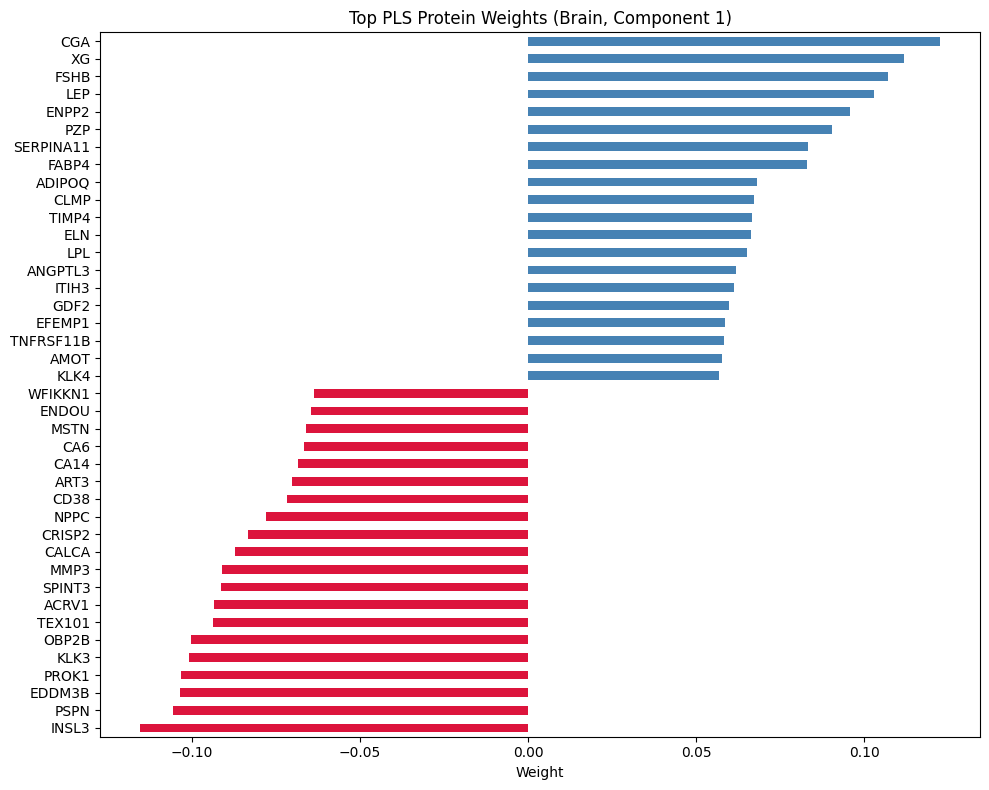

In [26]:
sorted_weights = protein_weights.sort_values()
top_n = 20
top_weights = pd.concat([sorted_weights.head(top_n), sorted_weights.tail(top_n)])
plt.figure(figsize=(10, 8))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Protein Weights (Brain, Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

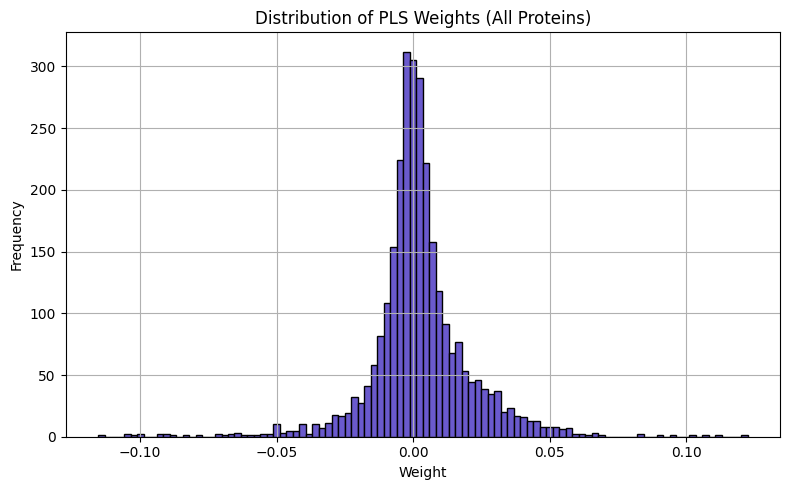

In [27]:
plt.figure(figsize=(8, 5))
protein_weights.hist(bins=100, color='slateblue', edgecolor='black')
plt.title("Distribution of PLS Weights (All Proteins)")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [3]:
immune_columns = [
    "eid", "31-0.0",
    "30000-0.0", "30000-1.0", "30000-2.0",
    "30120-0.0", "30120-1.0", "30120-2.0",
    "30130-0.0", "30130-1.0", "30130-2.0",
    "30140-0.0", "30140-1.0", "30140-2.0",
    "30150-0.0", "30150-1.0", "30150-2.0",
    "30160-0.0", "30160-1.0", "30160-2.0",
    "30180-0.0", "30180-1.0", "30180-2.0",
    "30190-0.0", "30190-1.0", "30190-2.0",
    "30200-0.0", "30200-1.0", "30200-2.0",
    "30210-0.0", "30210-1.0", "30210-2.0",
    "30220-0.0", "30220-1.0", "30220-2.0",
    "30710-0.0", "30710-1.0"
]




In [4]:
# Only read the first row (header) to inspect available columns
df_columns_only = pd.read_csv(r"C:\Users\Romina\Downloads\ukb674360 (1).txt", nrows=0, sep="\t")
print(df_columns_only.columns.tolist())


['eid', '21-0.0', '21-1.0', '21-2.0', '21-3.0', '31-0.0', '34-0.0', '36-0.0', '36-1.0', '36-2.0', '36-3.0', '37-0.0', '37-1.0', '37-2.0', '37-3.0', '39-0.0', '39-1.0', '39-2.0', '39-3.0', '40-0.0', '40-1.0', '40-2.0', '40-3.0', '41-0.0', '41-1.0', '41-2.0', '41-3.0', '44-0.0', '44-1.0', '44-2.0', '44-3.0', '48-0.0', '48-1.0', '48-2.0', '48-3.0', '49-0.0', '49-1.0', '49-2.0', '49-3.0', '50-0.0', '50-1.0', '50-2.0', '50-3.0', '51-0.0', '51-1.0', '51-2.0', '51-3.0', '52-0.0', '53-0.0', '53-1.0', '53-2.0', '53-3.0', '54-0.0', '54-1.0', '54-2.0', '54-3.0', '55-0.0', '55-1.0', '55-2.0', '55-3.0', '93-0.0', '93-0.1', '93-1.0', '93-1.1', '93-2.0', '93-2.1', '93-3.0', '93-3.1', '94-0.0', '94-0.1', '94-1.0', '94-1.1', '94-2.0', '94-2.1', '94-3.0', '94-3.1', '95-0.0', '95-0.1', '95-1.0', '95-1.1', '95-2.0', '95-2.1', '95-3.0', '95-3.1', '96-0.0', '96-0.1', '96-1.0', '96-1.1', '96-2.0', '96-2.1', '96-3.0', '96-3.1', '102-0.0', '102-0.1', '102-1.0', '102-1.1', '102-2.0', '102-2.1', '102-3.0', '102-

In [ ]:

# Read only header
df_header = pd.read_csv(r"C:\Users\Romina\Downloads\ukb674360 (1).txt", nrows=0, sep="\t")
all_columns = df_header.columns.tolist()

# Define base immune field codes (as strings so we can match by "starts with")
immune_field_ids = [
    "30000", "30120", "30130", "30140", "30150", "30160",  # counts
    "30180", "30190", "30200", "30210", "30220",           # percentages
    "30710",  # CRP
    "31",     # sex/age if needed
    "eid"     
]

# Automatically find matching columns
immune_columns_found = [col for col in all_columns if any(col.startswith(fid + "-") for fid in immune_field_ids) or col == "eid"]

# Print final list
print("✅ Found immune-related columns:")
for col in immune_columns_found:
    print(col)


✅ Found immune-related columns:
eid
31-0.0
30000-0.0
30000-1.0
30000-2.0
30120-0.0
30120-1.0
30120-2.0
30130-0.0
30130-1.0
30130-2.0
30140-0.0
30140-1.0
30140-2.0
30150-0.0
30150-1.0
30150-2.0
30160-0.0
30160-1.0
30160-2.0
30180-0.0
30180-1.0
30180-2.0
30190-0.0
30190-1.0
30190-2.0
30200-0.0
30200-1.0
30200-2.0
30210-0.0
30210-1.0
30210-2.0
30220-0.0
30220-1.0
30220-2.0
30710-0.0
30710-1.0


In [5]:
immune_data = r"c:\Users\Romina\Downloads\ukb674360 (1).txt"

In [6]:
immune_preview = pd.read_csv(immune_data, nrows=5, sep="\t")

In [7]:
columns_to_include = ["eid", "31-0.0", "34-0.0", "27328-3.0", "30000-0.0", "30000-1.0", "30000-2.0", "30110-2.0", "30170-2.0", 
    "30120-0.0", "30120-1.0", "30120-2.0",
    "30130-0.0", "30130-1.0", "30130-2.0",
    "30140-0.0", "30140-1.0", "30140-2.0",
    "30150-0.0", "30150-1.0", "30150-2.0",
    "30160-0.0", "30160-1.0", "30160-2.0",
    "30180-0.0", "30180-1.0", "30180-2.0",
    "30190-0.0", "30190-1.0", "30190-2.0",
    "30200-0.0", "30200-1.0", "30200-2.0",
    "30210-0.0", "30210-1.0", "30210-2.0",
    "30220-0.0", "30220-1.0", "30220-2.0",
    "30700-1.0", "30710-0.0", "30710-1.0" ] 

In [8]:
immune_data = pd.read_csv( immune_data, usecols=columns_to_include, sep="\t", on_bad_lines='skip')

In [9]:
immune_data

eid  31-0.0  34-0.0  27328-3.0  30000-0.0  30000-1.0  30000-2.0  \
NaN 1000018  1.0    1954  1045.0       5.22        NaN        NaN      4.105   
    1000024  1.0    1940  1051.0       7.50        NaN        NaN      3.990   
    1000031  1.0    1948  1058.0       8.27        NaN        NaN      4.097   
    1000043  1.0    1945  2817.0       5.22        NaN        NaN      4.246   
    1000059  1.0    1952  1045.0       7.70        NaN        NaN      4.910   
...          ...     ...     ...        ...        ...        ...        ...   
    4946719  1.0    1942  2815.0       5.19        NaN        NaN      4.299   
    4946727  1.0    1943   156.0       6.19        NaN        NaN      4.656   
    4946736  1.0    1949  2816.0       4.57        NaN        NaN      4.055   
    4946742  1.0    1958  2817.0       5.80        NaN        NaN      5.140   
    4946758  1.0    1957  2815.0        NaN        NaN        NaN        NaN   

             30110-2.0  30120-0.0  30120-1.0  ...  30200-2.0  30210-0.0  \
NaN 1000018       1.89        NaN        NaN  ...       1.81        NaN   
    1000024       2.00        NaN        NaN  ...       8.80        NaN   
    1000031       2.94        NaN        NaN  ...       2.84        NaN   
    1000043       1.60        NaN        NaN  ...       1.85        NaN   
    1000059       1.40        NaN        NaN  ...       2.00        NaN   
...                ...        ...        ...  ...        ...        ...   
    4946719       1.31        NaN        NaN  ...       1.57        NaN   
    4946727       1.03        NaN        NaN  ...       5.03        NaN   
    4946736       2.17        NaN        NaN  ...       1.84        NaN   
    4946742       1.70        NaN        NaN  ...       3.00        NaN   
    4946758        NaN        NaN        NaN  ...        NaN        NaN   

             30210-1.0  30210-2.0  30220-0.0  30220-1.0  30220-2.0  30700-1.0  \
NaN 1000018        NaN       0.31        NaN        NaN        0.0       0.79   
    1000024        NaN       0.30        NaN        NaN        0.0       0.39   
    1000031        NaN       3.21        NaN        NaN        0.0       0.72   
    1000043        NaN       0.56        NaN        NaN        0.0       0.75   
    1000059        NaN       0.10        NaN        NaN        0.0       1.63   
...                ...        ...        ...        ...        ...        ...   
    4946719        NaN       0.28        NaN        NaN        0.0        NaN   
    4946727        NaN       0.70        NaN        NaN        0.0       0.72   
    4946736        NaN       0.46        NaN        NaN        0.0       6.86   
    4946742        NaN       0.20        NaN        NaN        0.0       1.23   
    4946758        NaN        NaN        NaN        NaN        NaN        NaN   

             30710-0.0  30710-1.0  
NaN 1000018        NaN      0.874  
    1000024        NaN      1.041  
    1000031        NaN      1.092  
    1000043        NaN      0.909  
    1000059        NaN      0.819  
...                ...        ...  
    4946719        NaN        NaN  
    4946727        NaN      0.870  
    4946736        NaN      0.792  
    4946742        NaN      0.870  
    4946758        NaN        NaN  

[394668 rows x 42 columns]

In [10]:
if isinstance(immune_data.index, pd.MultiIndex):
    immune_data = immune_data.reset_index() 

In [11]:
immune_data

,level_0,level_1,eid,31-0.0,34-0.0,27328-3.0,30000-0.0,30000-1.0,30000-2.0,30110-2.0,...,30200-2.0,30210-0.0,30210-1.0,30210-2.0,30220-0.0,30220-1.0,30220-2.0,30700-1.0,30710-0.0,30710-1.0
0,NaN,1000018,1.0,1954,1045.0,5.22,NaN,NaN,4.105,1.89,...,1.81,NaN,NaN,0.31,NaN,NaN,0.0,0.79,NaN,0.874
1,NaN,1000024,1.0,1940,1051.0,7.50,NaN,NaN,3.990,2.00,...,8.80,NaN,NaN,0.30,NaN,NaN,0.0,0.39,NaN,1.041
2,NaN,1000031,1.0,1948,1058.0,8.27,NaN,NaN,4.097,2.94,...,2.84,NaN,NaN,3.21,NaN,NaN,0.0,0.72,NaN,1.092
3,NaN,1000043,1.0,1945,2817.0,5.22,NaN,NaN,4.246,1.60,...,1.85,NaN,NaN,0.56,NaN,NaN,0.0,0.75,NaN,0.909
4,NaN,1000059,1.0,1952,1045.0,7.70,NaN,NaN,4.910,1.40,...,2.00,NaN,NaN,0.10,NaN,NaN,0.0,1.63,NaN,0.819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394663,NaN,4946719,1.0,1942,2815.0,5.19,NaN,NaN,4.299,1.31,...,1.57,NaN,NaN,0.28,NaN,NaN,0.0,NaN,NaN,NaN
394664,NaN,4946727,1.0,1943,156.0,6.19,NaN,NaN,4.656,1.03,...,5.03,NaN,NaN,0.70,NaN,NaN,0.0,0.72,NaN,0.870
394665,NaN,4946736,1.0,1949,2816.0,4.57,NaN,NaN,4.055,2.17,...,1.84,NaN,NaN,0.46,NaN,NaN,0.0,6.86,NaN,0.792
394666,NaN,4946742,1.0,1958,2817.0,5.80,NaN,NaN,5.140,1.70,...,3.00,NaN,NaN,0.20,NaN,NaN,0.0,1.23,NaN,0.870


In [12]:
immune_data.drop(columns=["level_0"], inplace=True)

In [13]:
immune_data.rename(columns={"level_1": "temp_eid"}, inplace=True)

In [14]:
old_cols = immune_data.columns.tolist()
num_cols = len(old_cols)

In [15]:
new_cols = [None] * num_cols

In [16]:
new_cols[0] = "eid"

In [17]:
for i in range(1, num_cols - 1):
    new_cols[i] = old_cols[i + 1]

In [18]:
new_cols[-1] = "unknown"

In [19]:
immune_data.columns = new_cols

In [20]:
columns_to_drop = ["unknown", "31-0.0", "34-0.0", "27328-3.0", "30110-2.0", "30170-2.0", "30700-1.0"]
immune_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [21]:
immune_data

,eid,30000-0.0,30000-1.0,30000-2.0,30120-0.0,30120-1.0,30120-2.0,30130-0.0,30130-1.0,30130-2.0,...,30200-1.0,30200-2.0,30210-0.0,30210-1.0,30210-2.0,30220-0.0,30220-1.0,30220-2.0,30710-0.0,30710-1.0
0,1000018,5.22,NaN,NaN,1.89,NaN,NaN,0.27,NaN,NaN,...,NaN,NaN,1.81,NaN,NaN,0.31,NaN,NaN,0.79,NaN
1,1000024,7.50,NaN,NaN,2.00,NaN,NaN,0.60,NaN,NaN,...,NaN,NaN,8.80,NaN,NaN,0.30,NaN,NaN,0.39,NaN
2,1000031,8.27,NaN,NaN,2.94,NaN,NaN,0.62,NaN,NaN,...,NaN,NaN,2.84,NaN,NaN,3.21,NaN,NaN,0.72,NaN
3,1000043,5.22,NaN,NaN,1.60,NaN,NaN,0.31,NaN,NaN,...,NaN,NaN,1.85,NaN,NaN,0.56,NaN,NaN,0.75,NaN
4,1000059,7.70,NaN,NaN,1.40,NaN,NaN,0.20,NaN,NaN,...,NaN,NaN,2.00,NaN,NaN,0.10,NaN,NaN,1.63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394663,4946719,5.19,NaN,NaN,1.31,NaN,NaN,0.40,NaN,NaN,...,NaN,NaN,1.57,NaN,NaN,0.28,NaN,NaN,NaN,NaN
394664,4946727,6.19,NaN,NaN,1.03,NaN,NaN,0.48,NaN,NaN,...,NaN,NaN,5.03,NaN,NaN,0.70,NaN,NaN,0.72,NaN
394665,4946736,4.57,NaN,NaN,2.17,NaN,NaN,0.26,NaN,NaN,...,NaN,NaN,1.84,NaN,NaN,0.46,NaN,NaN,6.86,NaN
394666,4946742,5.80,NaN,NaN,1.70,NaN,NaN,0.40,NaN,NaN,...,NaN,NaN,3.00,NaN,NaN,0.20,NaN,NaN,1.23,NaN


In [22]:
immune_data.to_csv("correct but original immune data.csv", index=False)


In [23]:
proteomics_file = r"C:\Users\Romina\OneDrive\Desktop\Project\Clean Notebooks and files\proteomics_preprocessed.csv"
proteomics_df = pd.read_csv(proteomics_file)

C:\Users\Romina\AppData\Local\Temp\ipykernel_40404\889670466.py:2: DtypeWarning: Columns (25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,

In [24]:
immune_data = r"C:\Users\Romina\OneDrive\Desktop\Project\Clean Notebooks and files\correct but original immune data.csv"
immune_data = pd.read_csv(immune_data)

In [25]:
# keep only shared participants
shared_eids = set(proteomics_df['eid']).intersection(set(immune_data['eid']))
print(f"shared eids: {len(shared_eids)}")

shared eids: 41305


In [26]:
immune_data_shared = immune_data[immune_data['eid'].isin(shared_eids)]

In [27]:
print("immune shape (after intersecting with proteomics):", immune_data_shared.shape)

immune shape (after intersecting with proteomics): (41305, 36)


In [28]:
immune_cols_of_interest = ["30000-0.0", "30000-1.0", "30000-2.0"]

In [29]:
# Keep only participants with any immune values (in any of the 3 columns)
immune_valid = immune_data[
    immune_data[immune_cols_of_interest].notna().any(axis=1)
]

In [30]:
shared = pd.merge(proteomics_df, immune_valid, on="eid", how="inner")
print("Shared participants with proteomics and immune data:", shared.shape[0])

Shared participants with proteomics and immune data: 40021


In [31]:
missing_ratio = immune_valid.isna().mean()
columns_to_keep = missing_ratio[missing_ratio <= 0.5].index
immune_valid = immune_valid[columns_to_keep]


In [32]:
numeric_cols = immune_valid.select_dtypes(include=[np.number]).columns.difference(["eid"])
z_scores = immune_valid[numeric_cols].apply(zscore)
immune_valid[numeric_cols] = immune_valid[numeric_cols].mask((z_scores > 3) | (z_scores < -3))

In [33]:
immune_valid[numeric_cols] = immune_valid[numeric_cols].fillna(immune_valid[numeric_cols].mean())

In [34]:
immune_valid

,eid,30000-0.0,30120-0.0,30130-0.0,30140-0.0,30150-0.0,30160-0.0,30180-0.0,30190-0.0,30200-0.0,30210-0.0,30220-0.0,30710-0.0
0,1000018,5.22,1.89,0.27,2.95,0.09,0.02,36.22,5.22,56.50,1.81,0.31,0.790000
1,1000024,7.50,2.00,0.60,4.20,0.70,0.00,27.00,7.50,56.40,8.80,0.30,0.390000
2,1000031,8.27,2.94,0.62,4.21,0.23,0.27,35.59,7.49,50.90,2.84,3.21,0.720000
3,1000043,5.22,1.60,0.31,3.18,0.10,0.03,30.56,5.92,61.00,1.85,0.56,0.750000
4,1000059,7.70,1.40,0.20,6.00,0.20,0.00,17.70,2.10,78.10,2.00,0.10,1.630000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394662,4946703,5.84,1.89,0.35,3.10,0.43,0.08,32.36,6.01,53.00,7.28,1.32,0.690000
394663,4946719,5.19,1.31,0.40,3.38,0.08,0.01,25.15,7.78,65.10,1.57,0.28,2.593707
394664,4946727,6.19,1.03,0.48,4.33,0.31,0.04,16.64,7.83,69.90,5.03,0.70,0.720000
394665,4946736,4.57,2.17,0.26,2.04,0.08,0.02,47.40,5.67,44.57,1.84,0.46,6.860000


In [35]:
rename_dict = {
    "30000-0.0": "WBC count", "30120-0.0": "Lymphocyte count", "30130-0.0": "Monocyte count", "30140-0.0": "Neutrophil count", "30150-0.0": "Eosinophil count", "30160-0.0": "Basophil count",
    "30180-0.0": "Lymphocyte percentage", "30190-0.0": "Monocyte percentage", "30200-0.0": "Neutrophil percentage","30210-0.0": "Eosinophil percentage", "30220-0.0": "Basophil percentage", "30710-0.0": "C-reactive protein"
}
immune_valid.rename(columns=rename_dict, inplace=True)

In [36]:
immune_valid = immune_valid.drop(columns=["immune_variable"], errors='ignore')

In [37]:
immune_valid

,eid,WBC count,Lymphocyte count,Monocyte count,Neutrophil count,Eosinophil count,Basophil count,Lymphocyte percentage,Monocyte percentage,Neutrophil percentage,Eosinophil percentage,Basophil percentage,C-reactive protein
0,1000018,5.22,1.89,0.27,2.95,0.09,0.02,36.22,5.22,56.50,1.81,0.31,0.790000
1,1000024,7.50,2.00,0.60,4.20,0.70,0.00,27.00,7.50,56.40,8.80,0.30,0.390000
2,1000031,8.27,2.94,0.62,4.21,0.23,0.27,35.59,7.49,50.90,2.84,3.21,0.720000
3,1000043,5.22,1.60,0.31,3.18,0.10,0.03,30.56,5.92,61.00,1.85,0.56,0.750000
4,1000059,7.70,1.40,0.20,6.00,0.20,0.00,17.70,2.10,78.10,2.00,0.10,1.630000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394662,4946703,5.84,1.89,0.35,3.10,0.43,0.08,32.36,6.01,53.00,7.28,1.32,0.690000
394663,4946719,5.19,1.31,0.40,3.38,0.08,0.01,25.15,7.78,65.10,1.57,0.28,2.593707
394664,4946727,6.19,1.03,0.48,4.33,0.31,0.04,16.64,7.83,69.90,5.03,0.70,0.720000
394665,4946736,4.57,2.17,0.26,2.04,0.08,0.02,47.40,5.67,44.57,1.84,0.46,6.860000


In [38]:
final_merged = pd.merge(data1, immune_valid, on="eid", how="left")


In [39]:
final_merged["immune_variable"] = final_merged["WBC count"].notna().astype(int)

# Immune 
* all participants with immune-related variables

In [40]:
data_immune = final_merged[final_merged["immune_variable"] == 1].copy()
print("Number of participants with immune variables:", data_immune.shape[0])

Number of participants with immune variables: 40021


In [41]:
# Protein columns
protein_cols = data_immune.loc[:, "A1BG": "ZPR1"].columns
X_immune = data_immune[protein_cols]

In [42]:
immune_outcome_cols = [
   "WBC count", "Lymphocyte count", "Monocyte count", "Monocyte count", "Neutrophil count", "Eosinophil count", "Basophil count", "Lymphocyte percentage", "Monocyte percentage", 
   "Neutrophil percentage", "Eosinophil percentage", "Basophil percentage", "C-reactive protein" 
   ]

In [43]:
Y_immune = data_immune[immune_outcome_cols]

In [44]:
print("X shape:", X_immune.shape)
print("Y shape:", Y_immune.shape)

X shape: (40021, 2923)
Y shape: (40021, 13)


In [45]:
X_immune_clean = X_immune.dropna()
Y_immune_clean = Y_immune.loc[X_immune_clean.index].dropna()

X_immune_clean = X_immune_clean.loc[Y_immune_clean.index]
print("Clean X shape:", X_immune_clean.shape)
print("Clean Y shape:", Y_immune_clean.shape)

Clean X shape: (40021, 2923)
Clean Y shape: (40021, 13)


In [46]:

X_train, X_test, Y_train, Y_test = train_test_split(
    X_immune_clean, Y_immune_clean, test_size=0.2, random_state=42
)


pls_model = PLSRegression(n_components=1)


pls_model.fit(X_train, Y_train)


Y_pred = pls_model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
print("PLS Regression Test R² Score:", r2)

PLS Regression Test R² Score: 0.03353571680852804


In [ ]:
# Extract weights
protein_weights = pd.Series(
    pls_model.x_weights_.flatten(),
    index=X_immune_clean.columns,
    name="PLS_Component_1_Weight"
)

# Sort by absolute weight (strongest influence on component)
top_proteins = protein_weights.abs().sort_values(ascending=False).head(30)

# Display top 20 proteins (with their signed weights)
print(protein_weights.loc[top_proteins.index])

OSM         0.088301
TGFA        0.084650
HGF         0.080159
MMP9        0.078216
CEACAM8     0.075086
CLEC4D      0.074039
MMP8        0.067761
PLAUR       0.066013
PGLYRP1     0.066006
LILRA5      0.063101
LCN2        0.062128
LSP1        0.061696
IL6         0.060666
OLR1        0.060047
IL1RN       0.058001
NCF2        0.056993
VNN2        0.056036
EGLN1       0.054058
RETN        0.053527
TNFRSF1A    0.053090
FCN1        0.052469
CLEC6A      0.052168
ADAM8       0.051992
MPO         0.051420
CST7        0.050990
S100A12     0.050716
PRTN3       0.050608
NADK        0.050499
BGN        -0.050400
FGR         0.050299
Name: PLS_Component_1_Weight, dtype: float64


In [98]:
# Extract weights
pheno_weights = pd.Series(
    pls_model.y_weights_.flatten(),
    index=Y_immune_clean.columns,
    name="PLS_Component_1_Weight"
)

# Sort by absolute weight (strongest influence on component)
top_proteins = pheno_weights.abs().sort_values(ascending=False).head(30)

# Display top 20 proteins (with their signed weights)
print(pheno_weights.loc[top_proteins.index])

WBC count                0.020733
Neutrophil count         0.016581
Monocyte count           0.014368
Monocyte count           0.014368
Monocyte count           0.014368
Monocyte count           0.014368
Lymphocyte count         0.013376
C-reactive protein       0.013250
Eosinophil count         0.009406
Basophil count           0.006168
Lymphocyte percentage   -0.004013
Eosinophil percentage    0.003074
Monocyte percentage      0.002529
Neutrophil percentage    0.001999
Basophil percentage     -0.000906
Name: PLS_Component_1_Weight, dtype: float64


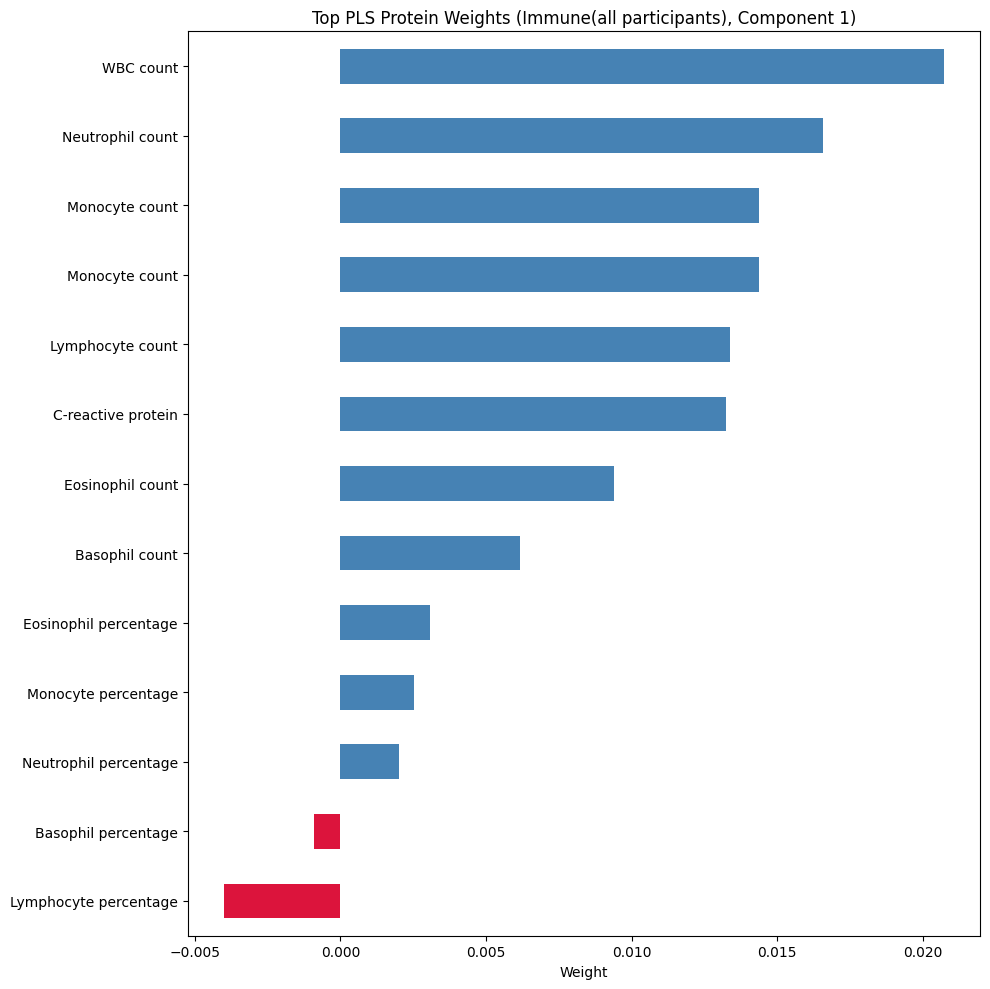

In [102]:
sorted_weights = pheno_weights.sort_values()
#top_n = 16
top_weights = sorted_weights
plt.figure(figsize=(10, 10))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Protein Weights (Immune(all participants), Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

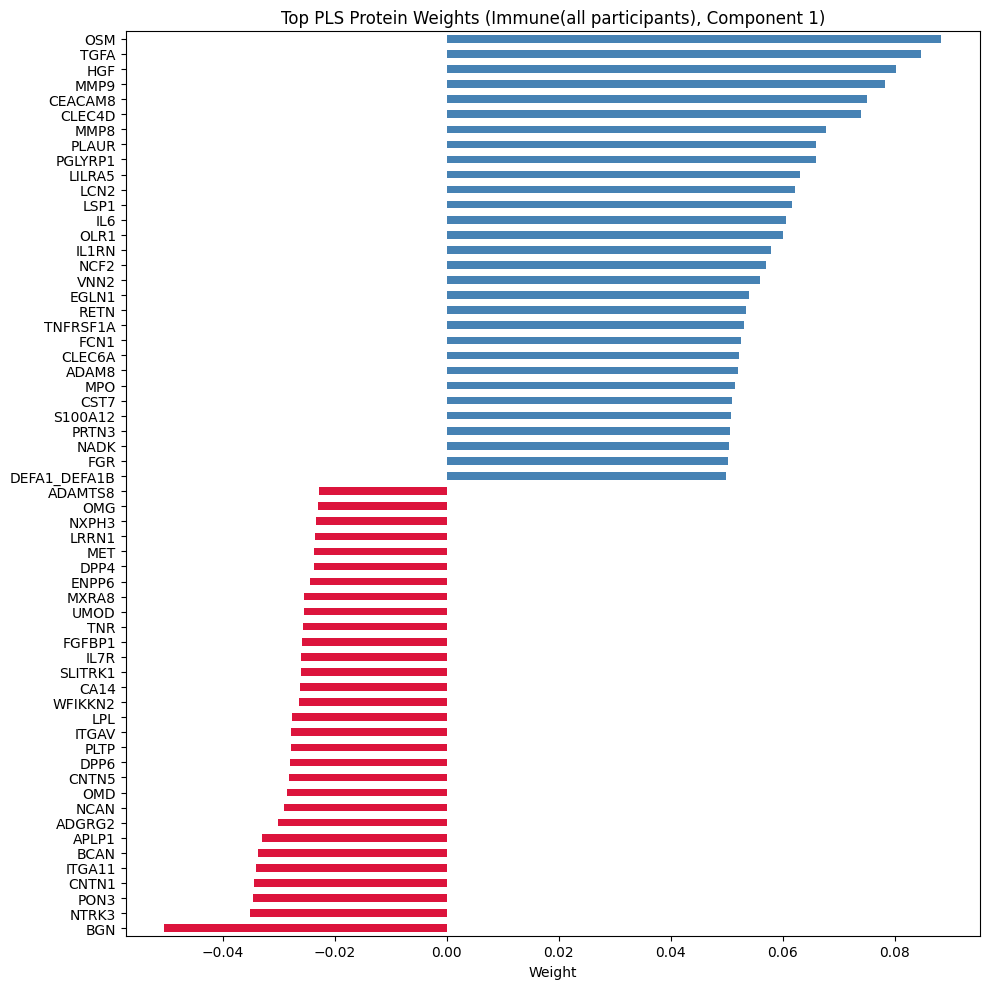

In [48]:
sorted_weights = protein_weights.sort_values()
top_n = 30
top_weights = pd.concat([sorted_weights.head(top_n), sorted_weights.tail(top_n)])
plt.figure(figsize=(10, 10))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Protein Weights (Immune(all participants), Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

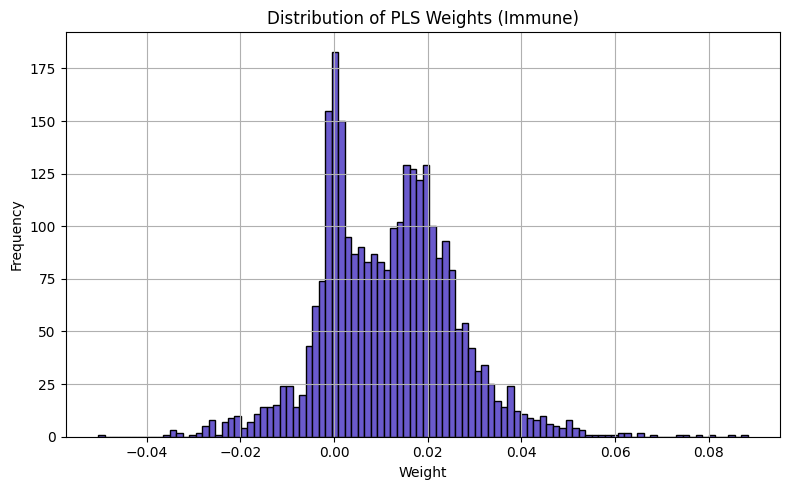

In [49]:
plt.figure(figsize=(8, 5))
protein_weights.hist(bins=100, color='slateblue', edgecolor='black')
plt.title("Distribution of PLS Weights (Immune)")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Immune 
* participants with both Immune and Imaging data 

In [50]:
data_immune = final_merged[ (final_merged["immune_variable"] == 1) & (final_merged["Imaging"] == 1)].copy()
print("Number of participants with immune variables and imaging:", data_immune.shape[0])


Number of participants with immune variables and imaging: 4585


In [51]:
protein_cols = data_immune.loc[:, "A1BG": "ZPR1"].columns
X_immune = data_immune[protein_cols]


In [52]:
immune_outcome_cols = [
   "WBC count", "Lymphocyte count", "Monocyte count", "Monocyte count", "Neutrophil count", "Eosinophil count", "Basophil count", "Lymphocyte percentage", "Monocyte percentage", 
   "Neutrophil percentage", "Eosinophil percentage", "Basophil percentage", "C-reactive protein" 
   ]


In [53]:
Y_immune = data_immune[immune_outcome_cols]
print("X shape:", X_immune.shape)
print("Y shape:", Y_immune.shape)


X shape: (4585, 2923)
Y shape: (4585, 13)


In [54]:
X_immune_clean = X_immune.dropna()
Y_immune_clean = Y_immune.loc[X_immune_clean.index].dropna()

X_immune_clean = X_immune_clean.loc[Y_immune_clean.index]
print("Clean X shape:", X_immune_clean.shape)
print("Clean Y shape:", Y_immune_clean.shape)


Clean X shape: (4585, 2923)
Clean Y shape: (4585, 13)


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_immune_clean, Y_immune_clean, test_size=0.2, random_state=42
)

pls_model = PLSRegression(n_components=1)

pls_model.fit(X_train, Y_train)

Y_pred = pls_model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
print("PLS Regression Test R² Score:", r2)


PLS Regression Test R² Score: 0.01750798169809947


In [56]:
# Extract weights
protein_weights = pd.Series(
    pls_model.x_weights_.flatten(),
    index=X_immune_clean.columns,
    name="PLS_Component_1_Weight"
)

# Sort by absolute weight (strongest influence on component)
top_proteins = protein_weights.abs().sort_values(ascending=False).head(30)

# Display top 20 proteins (with their signed weights)
print(protein_weights.loc[top_proteins.index])



OSM        0.096808
HGF        0.092397
TGFA       0.088982
MMP9       0.086339
CEACAM8    0.080617
LSP1       0.077999
CLEC4D     0.076566
MMP8       0.075757
LILRA5     0.073572
PGLYRP1    0.068946
OLR1       0.068885
PLAUR      0.067323
IL1RN      0.065838
NCF2       0.064318
NADK       0.063537
LCN2       0.062691
ELOA       0.061552
APEX1      0.061083
IL6        0.061048
EGLN1      0.060767
SMNDC1     0.058506
BGN       -0.058462
MNDA       0.058462
MPO        0.058163
VNN2       0.057333
FGR        0.056874
IL16       0.056707
S100A11    0.056233
ADAM8      0.055946
S100A12    0.055836
Name: PLS_Component_1_Weight, dtype: float64


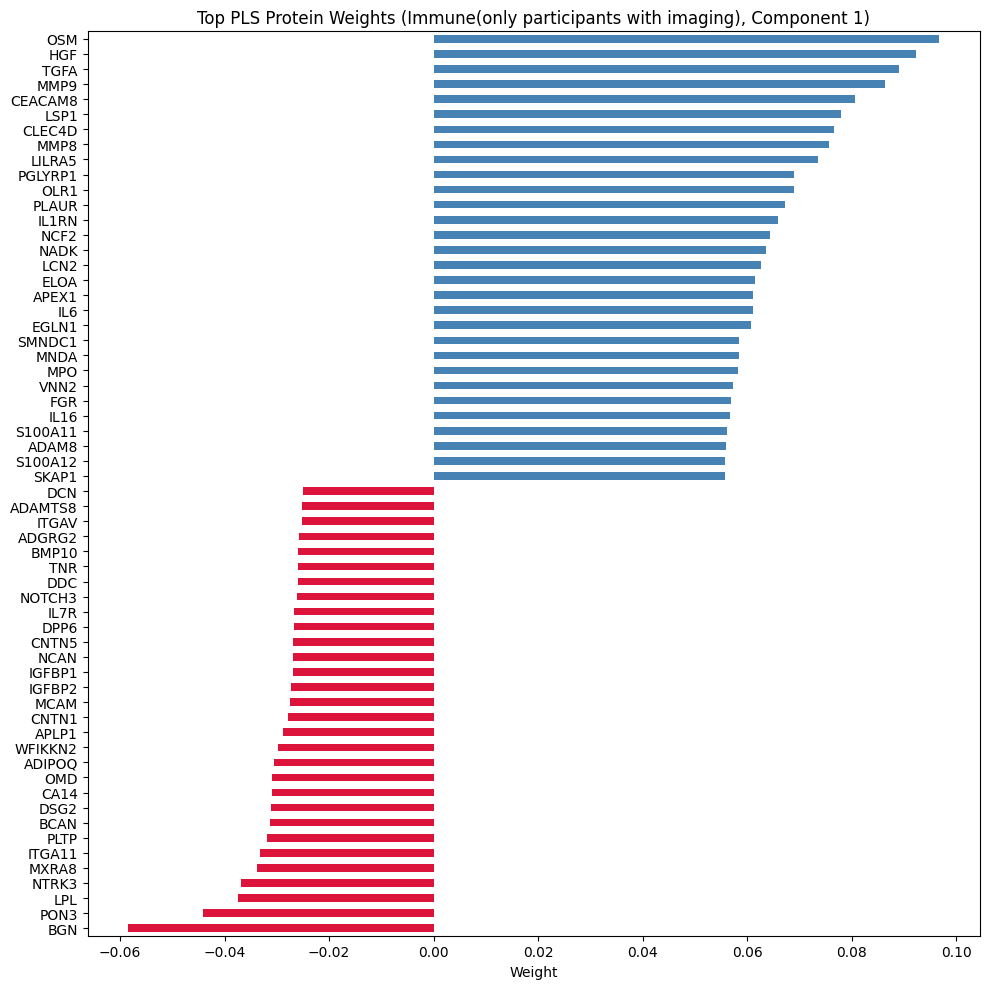

In [57]:
sorted_weights = protein_weights.sort_values()
top_n = 30
top_weights = pd.concat([sorted_weights.head(top_n), sorted_weights.tail(top_n)])
plt.figure(figsize=(10, 10))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Protein Weights (Immune(only participants with imaging), Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

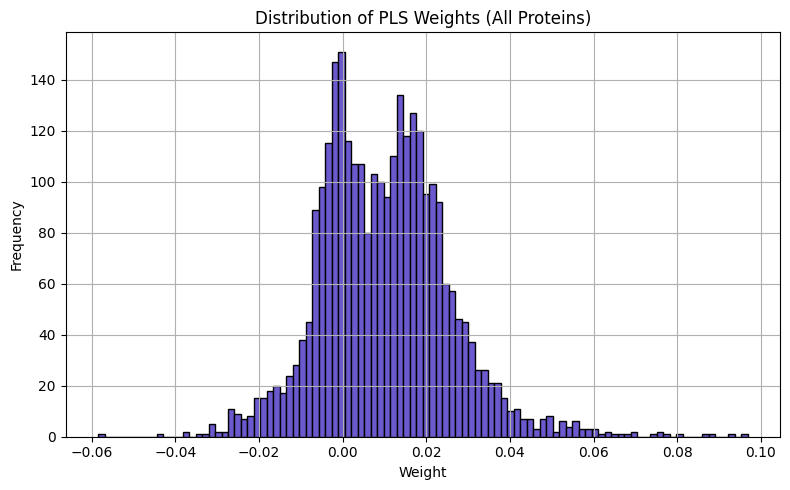

In [58]:
plt.figure(figsize=(8, 5))
protein_weights.hist(bins=100, color='slateblue', edgecolor='black')
plt.title("Distribution of PLS Weights (All Proteins)")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [59]:
Liver_data = r"c:\Users\Romina\Downloads\ukb674360 (1).txt"

In [60]:
liver_preview = pd.read_csv(Liver_data, nrows=5, sep="\t")

In [61]:
columns_to_include = ["eid", "31-0.0", "34-0.0", "30300-2.0", "30600-0.0", "30600-1.0", "30610-0.0", "30610-1.0",
                      "30620-0.0", "30620-1.0", "30640-1.0", "30650-0.0", "30650-1.0", "30720-1.0", "30730-0.0", "30730-1.0", 
                       "30660-0.0", "30660-1.0", "30830-1.0", "30840-0.0", "30840-1.0", "30830-1.0" , "30860-0.0", "30860-1.0"
 ]

In [65]:
Liver_data = pd.read_csv( Liver_data, usecols=columns_to_include, sep="\t", on_bad_lines='skip')

In [66]:
Liver_data

eid  31-0.0  34-0.0  30300-2.0  30600-0.0  30600-1.0  30610-0.0  \
NaN 1000018  1.0    1954  1045.0      46.79        NaN       69.5        NaN   
    1000024  1.0    1940  1051.0      45.72        NaN       83.7        NaN   
    1000031  1.0    1948  1058.0        NaN        NaN       59.3        NaN   
    1000043  1.0    1945  2817.0      47.62        NaN       80.7        NaN   
    1000059  1.0    1952  1045.0      44.49        NaN      119.8        NaN   
...          ...     ...     ...        ...        ...        ...        ...   
    4946719  1.0    1942  2815.0        NaN        NaN        NaN        NaN   
    4946727  1.0    1943   156.0      47.29        NaN       61.2        NaN   
    4946736  1.0    1949  2816.0      41.92        NaN       75.4        NaN   
    4946742  1.0    1958  2817.0      43.31        NaN      116.7        NaN   
    4946758  1.0    1957  2815.0        NaN        NaN        NaN        NaN   

             30610-1.0  30620-0.0  30620-1.0  ...  30660-0.0  30660-1.0  \
NaN 1000018      12.56        NaN      2.135  ...        NaN       5.61   
    1000024      13.31        NaN      1.551  ...        NaN       8.33   
    1000031      21.95        NaN        NaN  ...        NaN       8.17   
    1000043      17.17        NaN      1.732  ...        NaN       6.25   
    1000059      23.74        NaN      1.689  ...        NaN       4.51   
...                ...        ...        ...  ...        ...        ...   
    4946719        NaN        NaN        NaN  ...        NaN        NaN   
    4946727      24.88        NaN      1.999  ...        NaN       5.46   
    4946736      21.30        NaN      1.196  ...        NaN       6.85   
    4946742      19.30        NaN      1.270  ...        NaN       4.48   
    4946758        NaN        NaN        NaN  ...        NaN        NaN   

             30720-1.0  30730-0.0  30730-1.0  30830-1.0  30840-0.0  30840-1.0  \
NaN 1000018       20.4        NaN      5.318       7.03        NaN      3.713   
    1000024       16.8        NaN      5.768       8.06        NaN      0.729   
    1000031       30.8        NaN        NaN       7.91        NaN      0.716   
    1000043       23.4        NaN      4.909       8.53        NaN     12.372   
    1000059       42.1        NaN      5.262       4.73        NaN      0.421   
...                ...        ...        ...        ...        ...        ...   
    4946719        NaN        NaN        NaN        NaN        NaN        NaN   
    4946727       56.4        NaN      5.317       8.62        NaN     11.072   
    4946736       34.0        NaN      9.019       6.14        NaN      1.360   
    4946742       27.6        NaN      5.066       7.89        NaN      9.975   
    4946758        NaN        NaN        NaN        NaN        NaN        NaN   

             30860-0.0  30860-1.0  
NaN 1000018        NaN      0.642  
    1000024        NaN      1.225  
    1000031        NaN      1.402  
    1000043        NaN      0.880  
    1000059        NaN      2.173  
...                ...        ...  
    4946719        NaN        NaN  
    4946727        NaN      0.862  
    4946736        NaN      1.713  
    4946742        NaN      2.259  
    4946758        NaN        NaN  

[394668 rows x 23 columns]

In [69]:
if isinstance(Liver_data.index, pd.MultiIndex):
    Liver_data = Liver_data.reset_index() 

In [70]:
Liver_data

,level_0,level_1,eid,31-0.0,34-0.0,30300-2.0,30600-0.0,30600-1.0,30610-0.0,30610-1.0,...,30660-0.0,30660-1.0,30720-1.0,30730-0.0,30730-1.0,30830-1.0,30840-0.0,30840-1.0,30860-0.0,30860-1.0
0,NaN,1000018,1.0,1954,1045.0,46.79,NaN,69.5,NaN,12.56,...,NaN,5.61,20.4,NaN,5.318,7.03,NaN,3.713,NaN,0.642
1,NaN,1000024,1.0,1940,1051.0,45.72,NaN,83.7,NaN,13.31,...,NaN,8.33,16.8,NaN,5.768,8.06,NaN,0.729,NaN,1.225
2,NaN,1000031,1.0,1948,1058.0,NaN,NaN,59.3,NaN,21.95,...,NaN,8.17,30.8,NaN,NaN,7.91,NaN,0.716,NaN,1.402
3,NaN,1000043,1.0,1945,2817.0,47.62,NaN,80.7,NaN,17.17,...,NaN,6.25,23.4,NaN,4.909,8.53,NaN,12.372,NaN,0.880
4,NaN,1000059,1.0,1952,1045.0,44.49,NaN,119.8,NaN,23.74,...,NaN,4.51,42.1,NaN,5.262,4.73,NaN,0.421,NaN,2.173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394663,NaN,4946719,1.0,1942,2815.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394664,NaN,4946727,1.0,1943,156.0,47.29,NaN,61.2,NaN,24.88,...,NaN,5.46,56.4,NaN,5.317,8.62,NaN,11.072,NaN,0.862
394665,NaN,4946736,1.0,1949,2816.0,41.92,NaN,75.4,NaN,21.30,...,NaN,6.85,34.0,NaN,9.019,6.14,NaN,1.360,NaN,1.713
394666,NaN,4946742,1.0,1958,2817.0,43.31,NaN,116.7,NaN,19.30,...,NaN,4.48,27.6,NaN,5.066,7.89,NaN,9.975,NaN,2.259


In [71]:
Liver_data.drop(columns=["level_0"], inplace=True)

In [72]:
Liver_data.rename(columns={"level_1": "temp_eid"}, inplace=True)

In [74]:
old_cols = Liver_data.columns.tolist()
num_cols = len(old_cols)

In [75]:
new_cols = [None] * num_cols

In [76]:
new_cols[0] = "eid"

In [77]:
for i in range(1, num_cols - 1):
    new_cols[i] = old_cols[i + 1]

In [78]:
new_cols[-1] = "unknown"

In [79]:
Liver_data.columns = new_cols

In [80]:
Liver_data

,eid,31-0.0,34-0.0,30300-2.0,30600-0.0,30600-1.0,30610-0.0,30610-1.0,30620-0.0,30620-1.0,...,30660-1.0,30720-1.0,30730-0.0,30730-1.0,30830-1.0,30840-0.0,30840-1.0,30860-0.0,30860-1.0,unknown
0,1000018,1.0,1954,1045.0,46.79,NaN,69.5,NaN,12.56,NaN,...,NaN,5.61,20.4,NaN,5.318,7.03,NaN,3.713,NaN,0.642
1,1000024,1.0,1940,1051.0,45.72,NaN,83.7,NaN,13.31,NaN,...,NaN,8.33,16.8,NaN,5.768,8.06,NaN,0.729,NaN,1.225
2,1000031,1.0,1948,1058.0,NaN,NaN,59.3,NaN,21.95,NaN,...,NaN,8.17,30.8,NaN,NaN,7.91,NaN,0.716,NaN,1.402
3,1000043,1.0,1945,2817.0,47.62,NaN,80.7,NaN,17.17,NaN,...,NaN,6.25,23.4,NaN,4.909,8.53,NaN,12.372,NaN,0.880
4,1000059,1.0,1952,1045.0,44.49,NaN,119.8,NaN,23.74,NaN,...,NaN,4.51,42.1,NaN,5.262,4.73,NaN,0.421,NaN,2.173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394663,4946719,1.0,1942,2815.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394664,4946727,1.0,1943,156.0,47.29,NaN,61.2,NaN,24.88,NaN,...,NaN,5.46,56.4,NaN,5.317,8.62,NaN,11.072,NaN,0.862
394665,4946736,1.0,1949,2816.0,41.92,NaN,75.4,NaN,21.30,NaN,...,NaN,6.85,34.0,NaN,9.019,6.14,NaN,1.360,NaN,1.713
394666,4946742,1.0,1958,2817.0,43.31,NaN,116.7,NaN,19.30,NaN,...,NaN,4.48,27.6,NaN,5.066,7.89,NaN,9.975,NaN,2.259


In [81]:
columns_to_drop = ["unknown", "31-0.0", "34-0.0", "30300-2.0", "30640-1.0", "30720-1.0", "30830-1.0", "30830-1.0"]
Liver_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [82]:
Liver_data

,eid,30600-0.0,30600-1.0,30610-0.0,30610-1.0,30620-0.0,30620-1.0,30650-0.0,30650-1.0,30660-0.0,30660-1.0,30730-0.0,30730-1.0,30840-0.0,30840-1.0,30860-0.0,30860-1.0
0,1000018,46.79,NaN,69.5,NaN,12.56,NaN,19.7,NaN,1.34,NaN,20.4,NaN,7.03,NaN,3.713,NaN
1,1000024,45.72,NaN,83.7,NaN,13.31,NaN,22.7,NaN,1.47,NaN,16.8,NaN,8.06,NaN,0.729,NaN
2,1000031,NaN,NaN,59.3,NaN,21.95,NaN,17.9,NaN,1.98,NaN,30.8,NaN,7.91,NaN,0.716,NaN
3,1000043,47.62,NaN,80.7,NaN,17.17,NaN,21.9,NaN,1.98,NaN,23.4,NaN,8.53,NaN,12.372,NaN
4,1000059,44.49,NaN,119.8,NaN,23.74,NaN,22.7,NaN,NaN,NaN,42.1,NaN,4.73,NaN,0.421,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394663,4946719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394664,4946727,47.29,NaN,61.2,NaN,24.88,NaN,35.7,NaN,1.73,NaN,56.4,NaN,8.62,NaN,11.072,NaN
394665,4946736,41.92,NaN,75.4,NaN,21.30,NaN,21.2,NaN,1.19,NaN,34.0,NaN,6.14,NaN,1.360,NaN
394666,4946742,43.31,NaN,116.7,NaN,19.30,NaN,26.1,NaN,1.42,NaN,27.6,NaN,7.89,NaN,9.975,NaN


In [90]:
Liver_data.to_csv("correct but original Liver data.csv", index=False)

In [91]:
Liver_data = r"C:\Users\Romina\OneDrive\Desktop\Project\Clean Notebooks and files\correct but original Liver data.csv"
Liver_data = pd.read_csv(Liver_data)

In [92]:
# keep only shared participants
shared_eids = set(proteomics_df['eid']).intersection(set(Liver_data['eid']))
print(f"shared eids: {len(shared_eids)}")

shared eids: 41305


In [93]:
Liver_data_shared = Liver_data[Liver_data['eid'].isin(shared_eids)]

In [94]:
print("liver shape (after intersecting with proteomics):", Liver_data_shared.shape)

liver shape (after intersecting with proteomics): (41305, 37)


In [95]:
liver_cols_of_interest = ["30600-0.0"]

In [97]:
Liver_data_shared

,index,eid,30000-0.0,30000-1.0,30000-2.0,30120-0.0,30120-1.0,30120-2.0,30130-0.0,30130-1.0,...,30200-1.0,30200-2.0,30210-0.0,30210-1.0,30210-2.0,30220-0.0,30220-1.0,30220-2.0,30710-0.0,30710-1.0
1,1,1000024,7.50,NaN,NaN,2.00,NaN,NaN,0.60,NaN,...,NaN,NaN,8.80,NaN,NaN,0.30,NaN,NaN,0.39,NaN
3,3,1000043,5.22,NaN,NaN,1.60,NaN,NaN,0.31,NaN,...,NaN,NaN,1.85,NaN,NaN,0.56,NaN,NaN,0.75,NaN
14,14,1000156,4.30,NaN,NaN,1.20,NaN,NaN,0.20,NaN,...,NaN,NaN,1.60,NaN,NaN,0.30,NaN,NaN,4.16,NaN
20,20,1000217,3.96,NaN,NaN,1.27,NaN,NaN,0.35,NaN,...,NaN,NaN,1.40,NaN,NaN,0.35,NaN,NaN,1.79,NaN
29,29,1000309,6.12,NaN,NaN,2.72,NaN,NaN,0.43,NaN,...,NaN,NaN,12.70,NaN,NaN,0.30,NaN,NaN,0.27,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394635,394635,4946434,8.33,NaN,NaN,1.96,NaN,NaN,0.33,NaN,...,NaN,NaN,1.44,NaN,NaN,0.40,NaN,NaN,1.26,NaN
394641,394641,4946496,9.68,NaN,NaN,2.92,NaN,NaN,0.55,NaN,...,NaN,NaN,3.84,NaN,NaN,0.38,NaN,NaN,0.71,NaN
394648,394648,4946567,6.66,NaN,NaN,2.43,NaN,NaN,0.91,NaN,...,NaN,NaN,9.49,NaN,NaN,0.67,NaN,NaN,0.59,NaN
394656,394656,4946648,4.37,NaN,NaN,1.49,NaN,NaN,0.44,NaN,...,NaN,NaN,1.51,NaN,NaN,0.27,NaN,NaN,1.47,NaN


In [96]:
# Keep only participants with any immune values (in any of the 3 columns)
Liver_valid = Liver_data[
    Liver_data[liver_cols_of_interest].notna().any(axis=1)]

KeyError: "None of [Index(['30600-0.0'], dtype='object')] are in the [columns]"